<div style="background-color: lightgreen; color: black; padding: 20px;">
    <h3>Project 8- NewYork City Yellow Cab processing large datasets
</h3> </div>

1. Access NYC Yellow Cab dataset from public sources
2. Clean and preprocess data to remove errors and inconsistencies
3.  Store cleaned data in a database for analysis
4.  Perform exploratory data analysis (EDA) to identify key trends
5.  Analyze peak times, popular routes, and fare patterns
6.  Identify correlations or anomalies in the dataset
7.  Create visualizations to present key findings
8.  Build a dashboard for interactive data exploration
9.  Generate a final report summarizing insights

In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
import sqlite3
#df = pd.read_csv("nyc_yello_taxi_tripdata.csv")
#df

In [31]:
#Load the data
data = pd.read_parquet(r"C:\\Users\macma\OneDrive\Desktop\Data Analytics\yellow_tripdata_2024-08.parquet")

# Display the first 5 rows
# data.head()
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-08-01 00:21:00,2024-08-01 00:36:13,1.0,7.40,1.0,N,138,80,1,28.90,7.75,0.5,7.65,0.00,1.0,45.80,0.0,1.75
1,2,2024-08-01 00:20:01,2024-08-01 00:41:47,1.0,9.91,1.0,N,138,239,1,40.80,6.00,0.5,11.55,6.94,1.0,71.04,2.5,1.75
2,1,2024-08-01 00:17:52,2024-08-01 00:41:45,0.0,13.40,1.0,N,138,88,1,52.00,10.25,0.5,15.00,0.00,1.0,78.75,2.5,1.75
3,1,2024-08-01 00:49:08,2024-08-01 00:55:56,0.0,3.90,1.0,N,209,137,3,17.00,3.50,0.5,0.00,0.00,1.0,22.00,2.5,0.00
4,1,2024-08-01 00:38:52,2024-08-01 00:42:34,1.0,0.40,1.0,N,148,144,2,5.10,3.50,0.5,0.00,0.00,1.0,10.10,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979178,2,2024-08-31 23:22:27,2024-08-31 23:52:10,NaN,10.90,NaN,None,56,35,0,41.25,0.00,0.5,0.00,0.00,1.0,42.75,NaN,NaN
2979179,2,2024-08-31 23:46:00,2024-09-01 00:10:00,NaN,6.42,NaN,None,148,236,0,26.70,0.00,0.5,0.00,0.00,1.0,30.70,NaN,NaN
2979180,2,2024-08-31 23:41:20,2024-08-31 23:56:24,NaN,1.89,NaN,None,68,100,0,18.90,0.00,0.5,0.00,0.00,1.0,22.90,NaN,NaN
2979181,2,2024-08-31 23:20:50,2024-08-31 23:35:33,NaN,6.02,NaN,None,231,141,0,29.13,0.00,0.5,0.00,0.00,1.0,33.13,NaN,NaN


In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979183 entries, 0 to 2979182
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [33]:
# Identifying and Removing Duplicates
# Check for duplicates
duplicate_count = data.duplicated().sum()  # Summarizes the number of duplicates for removal if any
data.drop_duplicates(inplace=True)  # Removes duplicate records to ensure data integrity


In [34]:
#Remove rows with missing or zero passenger counts, fare amounts and trip distances
cleaned_data = data[
    (data['passenger_count'] > 0) &
    (data['fare_amount'] > 0) &
    (data['trip_distance'] > 0)
]

In [36]:
# Convert pickup and dropoff times to datetime for easier analysis
cleaned_data.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(cleaned_data['tpep_pickup_datetime'])
cleaned_data.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(cleaned_data['tpep_dropoff_datetime'])

# Get hour, day of the week, and trip duration
cleaned_data.loc[:, 'pickup_hour'] = cleaned_data['tpep_pickup_datetime'].dt.hour
cleaned_data.loc[:, 'pickup_day'] = cleaned_data['tpep_pickup_datetime'].dt.day_name()
cleaned_data.loc[:, 'trip_duration'] = (cleaned_data['tpep_dropoff_datetime'] - cleaned_data['tpep_pickup_datetime']).dt.total_seconds() / 60


In [37]:
#Store the cleaned data in a database
conn = sqlite3.connect('yellow_cab.db')
cleaned_data.to_sql('cleaned_trips', conn, if_exists = 'replace', index = False)

2603943

C:\Users\macma\AppData\Local\Temp\ipykernel_23688\3867762244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'pickup_hour', data = cleaned_data, palette = 'viridis')


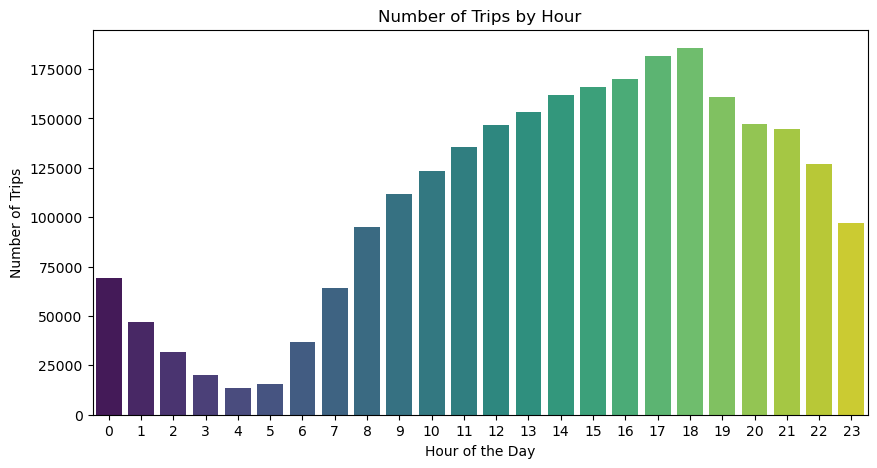

In [38]:
#Analyze Peak Hours
plt.figure(figsize = (10, 5))
sns.countplot(x = 'pickup_hour', data = cleaned_data, palette = 'viridis')
plt.title('Number of Trips by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

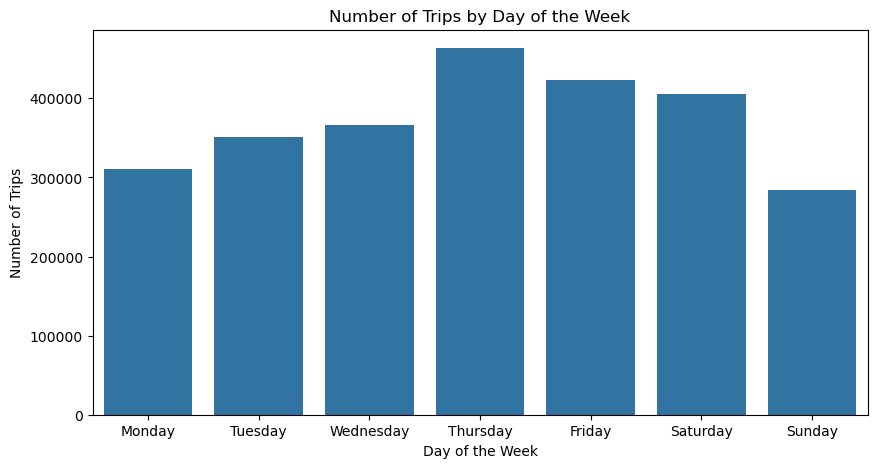

In [39]:
#Analyze Popular Pickup Days
plt.figure(figsize = (10, 5))
sns.countplot(x = 'pickup_day', data = cleaned_data, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

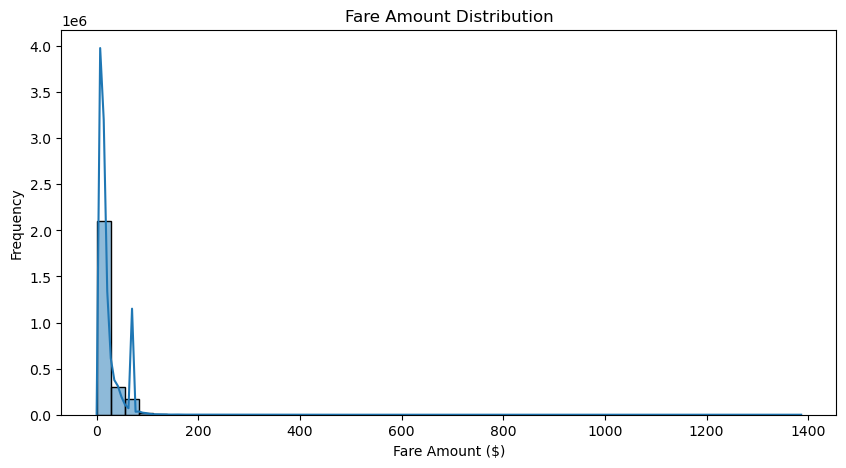

In [40]:
#Analyze Fare Amount Distribution
plt.figure(figsize = (10, 5))
sns.histplot(cleaned_data['fare_amount'], bins = 50, kde = True)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

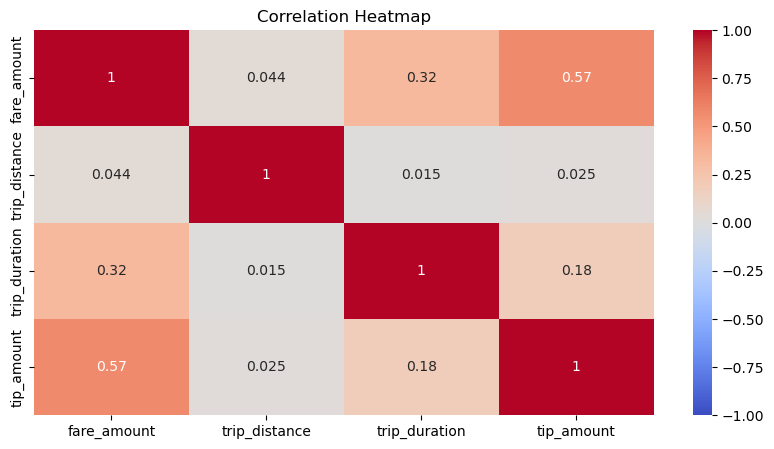

In [52]:
#Correlation Heatmap for Numerical Features
plt.figure(figsize = (10, 5))
sns.heatmap(cleaned_data[['fare_amount', 'trip_distance', 'trip_duration', 'tip_amount']].corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# store data in csv file
df.to_csv('processed_yellow_cab_data.csv', index=False)

In [46]:
# Peak Times
df.loc[:, 'hour'] = df['tpep_pickup_datetime'].dt.hour
peak_hours = df['hour'].value_counts().sort_index()

# Popular Routes
top_routes = df.groupby(['trip_distance', 'total_amount']).size().nlargest(10)

# Fare Patterns
fare_pattern = df['fare_amount'].describe()

# Display results
print("Peak Hours:\n", peak_hours)
print("Top Routes:\n", top_routes)
print("Fare Pattern:\n", fare_pattern)



Peak Hours:
 hour
0      83769
1      57768
2      39682
3      26212
4      19270
5      20473
6      46243
7      73194
8     108693
9     124612
10    135126
11    149201
12    162235
13    170369
14    179619
15    183745
16    190124
17    208047
18    214470
19    184532
20    169504
21    167209
22    150168
23    114918
Name: count, dtype: int64
Top Routes:
 trip_distance  total_amount
0.0            7.0             2894
               4.5             2351
0.7            12.6            2154
0.8            12.6            1863
0.6            12.6            1711
0.9            12.6            1448
1.3            16.8            1325
1.4            16.8            1278
1.2            16.8            1268
1.0            15.1            1181
dtype: int64
Fare Pattern:
 count    2.979183e+06
mean     1.972051e+01
std      2.102358e+01
min     -1.174100e+03
25%      9.300000e+00
50%      1.350000e+01
75%      2.260000e+01
max      1.386200e+03
Name: fare_amount, dtype: float64


In [53]:
# Identify anomalies (e.g., unusually high fares or long trip times)
anomalies = df[(df['fare_amount'] > df['fare_amount'].quantile(0.99))]
print("Anomalies:\n", anomalies.head())

Anomalies:
      VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
52          2  2024-08-01 00:25:46   2024-08-01 00:53:48              1.0   
264         2  2024-08-01 00:46:10   2024-08-01 01:23:24              2.0   
493         2  2024-08-01 00:31:48   2024-08-01 01:07:46              1.0   
532         2  2024-08-01 00:24:50   2024-08-01 01:02:53              1.0   
533         2  2024-08-01 00:46:59   2024-08-01 01:26:08              1.0   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
52           18.85         5.0                  N            70           265   
264          24.41         1.0                  N           132           228   
493          23.22         1.0                  N           132           112   
532          31.34         4.0                  N           138           265   
533          27.16         1.0                  N           132           265   

     payment_type  fare_amount  extra 

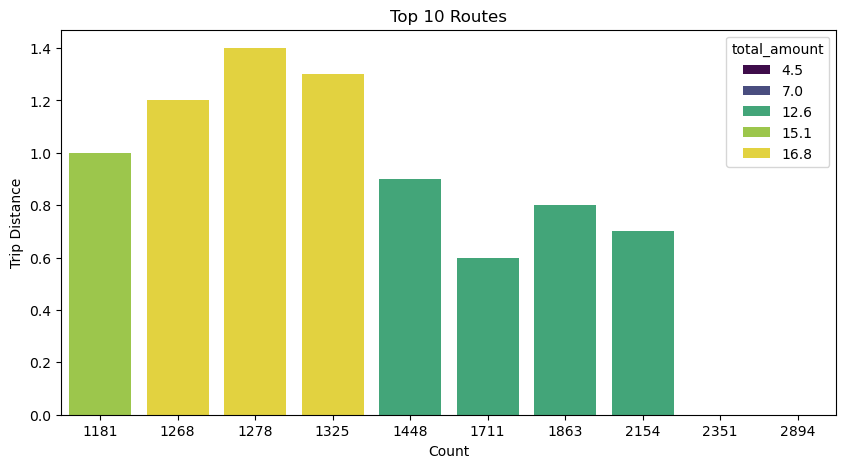

In [60]:

# Re-import matplotlib.pyplot as plt to ensure it works correctly
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for seaborn
popular_routes_df = top_routes.reset_index(name='count')

# Set up the figure size
plt.figure(figsize=(10, 5))

# Create a bar plot using seaborn
sns.barplot(data=popular_routes_df, x='count', y='trip_distance', hue='total_amount', palette='viridis')

# Add title and labels
plt.title("Top 10 Routes")
plt.xlabel("Count")
plt.ylabel("Trip Distance")

# Display the plot
plt.show()


In [51]:
#Generate a final Report
summary = cleaned_data.describe()
print("Summary Statistics of Cleaned Data:")
print(summary)

#Close the database connection
conn.close()


Summary Statistics of Cleaned Data:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.603943e+06                     2603943                     2603943   
mean   1.772611e+00  2024-08-16 08:07:50.304196  2024-08-16 08:25:29.368678   
min    1.000000e+00         2009-01-01 00:02:52         2009-01-01 20:28:16   
25%    2.000000e+00         2024-08-08 09:39:19  2024-08-08 09:57:21.500000   
50%    2.000000e+00         2024-08-16 02:27:52         2024-08-16 02:45:05   
75%    2.000000e+00  2024-08-24 00:57:20.500000  2024-08-24 01:12:07.500000   
max    2.000000e+00         2024-09-10 12:27:29         2024-09-10 19:45:57   
std    4.191457e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     2.603943e+06   2.603943e+06  2.603943e+06  2.603943e+06   
mean      1.369805e+00   3.894218e+00  2.633160e+00  1.625985e+02   
min       1.000000e+00   1.000000e-02  1.0000

#### Final Report: NYC Yellow Cab Data Analysis
1. Number of Trips by Hour
* The peak hours for yellow cab trips occur in the afternoon and early evening, particularly between 2 PM and 7 PM.
* Trip frequency gradually increases from early morning, reaching a peak around 5-6 PM, which aligns with the end of the workday and rush hours.
* Late-night and early-morning hours (from 12 AM to 5 AM) show the lowest trip counts, indicating reduced demand during these times.
2. Number of Trips by Day of the Week
* Thursday has the highest number of trips among all days of the week, with Friday and Saturday following closely.
* Sunday shows the lowest number of trips, likely due to reduced commuter activity and lower demand.
* This pattern suggests that yellow cabs are more frequently used on weekdays, possibly for commuting purposes, with a slight increase on Fridays and Saturdays, likely due to social and recreational activities.
3. Correlation Heatmap
The heatmap reveals moderate positive correlations between several variables:
* Fare Amount and Tip Amount: There is a positive correlation, indicating that higher fares tend to correlate with higher tips.
* Fare Amount and Trip Duration: Longer trips, which likely lead to higher fares, also exhibit a correlation with the tip amount, which is intuitive.
* The correlation between trip distance and fare amount is weaker than expected, which may indicate the influence of other fare determinants, such as fixed fares or surcharges applied to shorter trips.
4. Top 10 Routes by Trip Distance and Total Amount
* The bar plot of popular routes shows that some of the highest trip distances have relatively low total amounts, suggesting that certain routes may have fixed or discounted rates.
* Total amount varies widely among the top 10 routes, with certain routes showing a higher concentration of fares in the mid-range (around $12-$17).
* This information could be useful for cab companies to assess the profitability of different routes and identify opportunities for fare adjustments or promotional strategies.

#### Insights and Recommendations
1. Demand Optimization:
* Cab operators could optimize their availability based on the peak demand hours, focusing fleet deployment around late afternoon and evening on weekdays and slightly increasing availability on Fridays and Saturdays.
2. Revenue Enhancement:
* Fare pricing strategies could be revisited for routes with low correlation between trip distance and fare amount. Special pricing or discount strategies may be applied during low-demand hours to incentivize use.
3. Promotions and Marketing:
* Promotions targeting evening commuters and weekend travelers could help increase ridership during off-peak days and hours, potentially boosting revenue and cab utilization.
4. Customer Satisfaction:
* Given the positive correlation between fare and tip amount, drivers could be incentivized to provide excellent service on longer, higher-fare trips, as these tend to yield higher tips.